In [ ]:
# experimenting with multiprocessing to create a function that downloads image files

In [1]:
!pip install duckduckgo_search

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.4/75.4 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.5/74.5 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 39.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.6 MB/s eta 0:00:00


In [2]:
from duckduckgo_search import ddg_images
# lets get 30 images of birds
def search_images(text, max_results=30):
  responses = ddg_images(text, max_results)
  urls = [r['image'] for r in responses]
  return urls

urls = search_images('bird photo')

/usr/local/lib/python3.10/dist-packages/duckduckgo_search/compat.py:60: UserWarning: ddg_images is deprecated. Use DDGS().images() generator
  warnings.warn("ddg_images is deprecated. Use DDGS().images() generator")
/usr/local/lib/python3.10/dist-packages/duckduckgo_search/compat.py:64: UserWarning: parameter page is deprecated
  warnings.warn("parameter page is deprecated")


In [15]:
import multiprocessing
import requests

def download_file(url, save_path, result_queue):
    response = requests.get(url)
    if response.status_code == 200:
        with open(save_path, 'wb') as file:
            file.write(response.content)
            result_queue.put((url, True))
    else:
        result_queue.put((url, False))

def download_files_parallel(file_urls, save_paths):
  # this que saves the output from each concurrent process. we dont know the order in which they'll complete
  result_queue = multiprocessing.Queue()

  # we instantiate and start a process for each url
  # the loop is near instantaneous as there is no wait time once a process is started
  processes = []
  for url, save_path in zip(file_urls, save_paths):
      process = multiprocessing.Process(target=download_file, args=(url, save_path, result_queue))
      process.start()
      processes.append(process)

  # this cycles through all the processes and waits for them to complete
  for process in processes:
      process.join()

  # now the processes are complete, we can take the output of each process from the que
  results = [] # this stores the outputs, a list of tuples (file_name, download_successful)
  while not result_queue.empty():
    # we now run through the que and pull of each item in sequence, adding it to our list
      results.append(result_queue.get())

  return results

def main():
    file_urls = urls  # the web urls to download from
    save_paths = [f'bird {i}.jpg' for i in range(30)]  # what to save the files as
    results = download_files_parallel(file_urls, save_paths) # this is a list of tupples [(file_name, download_successful),..]
    for url, success in results:
      if success:
          print(f"Downloaded {url}")
      else:
          print(f"Failed to download {url}")

if __name__ == "__main__":
    main()


Downloaded http://2.bp.blogspot.com/-TA1D79yxcnM/Tyy6ng42rbI/AAAAAAAAAnc/-4s-bZaYc_U/s1600/colorfull+bird+HD+wallpaper.jpg
Downloaded http://2.bp.blogspot.com/-Qo2qpwne2oU/UBTq40Ei4PI/AAAAAAAAX_s/UTe83apvFtE/s1600/Bluebird+(Eastern)-9491.jpg
Downloaded http://2.bp.blogspot.com/_4NJHd2GlpUw/S9-QcyqZnBI/AAAAAAAAB5E/Kq7xXnqkV-w/s1600/Cardinal-Norther,+male+IMG_0048b.jpg
Downloaded http://3.bp.blogspot.com/-OXcBzG5z_Dg/UPAsT_jylaI/AAAAAAAAAM8/jCf8DRh3JlM/s1600/bird+03.jpg
Failed to download https://www.almanac.com/sites/default/files/image_nodes/bluebird-3456115_1920.jpg
Downloaded http://2.bp.blogspot.com/_gV-NxB_52J8/TFryz-pCJII/AAAAAAAAAco/G4YO-_-uNUQ/s1600/4fb4dc3fc15cc440e3a4b7c0a4b71717BirdsScreensaver_1.jpg
Downloaded https://2.bp.blogspot.com/-g9STQqFQ9Ik/UScse2IifqI/AAAAAAAAA08/mh1immEtVZo/s1600/bluebird.jpg
Downloaded http://images4.fanpop.com/image/photos/23800000/Beautiful-Birds-beautiful-nature-23812588-762-785.jpg
Downloaded https://images.pexels.com/photos/1661179/pexels-pho

In [6]:
!ls

'bird 0.jpg'   'bird 15.jpg'  'bird 21.jpg'  'bird 28.jpg'  'bird 6.jpg'
'bird 10.jpg'  'bird 16.jpg'  'bird 22.jpg'  'bird 29.jpg'  'bird 7.jpg'
'bird 11.jpg'  'bird 17.jpg'  'bird 23.jpg'  'bird 2.jpg'   'bird 8.jpg'
'bird 12.jpg'  'bird 18.jpg'  'bird 25.jpg'  'bird 3.jpg'   'bird 9.jpg'
'bird 13.jpg'  'bird 19.jpg'  'bird 26.jpg'  'bird 4.jpg'   'bird i.jpg'
'bird 14.jpg'  'bird 20.jpg'  'bird 27.jpg'  'bird 5.jpg'    sample_data


(1600, 1200)


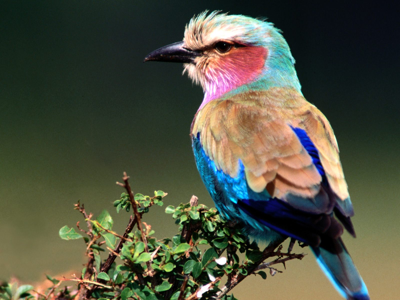

In [16]:
# lets view the first image
from PIL import Image
# creating a object
im = Image.open("bird 0.jpg")
print(im.size)
im.resize((400, 300)) #im.show() not working on google colab